<a href="https://colab.research.google.com/github/cosimo-schiavoni/Massive_Data_Project/blob/main/Cats_Dogs_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sun Jul 17 14:20:44 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# Keras / Deep Learning
import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras import optimizers, regularizers
#from tensorflow.keras.optimizers import Adam

In [3]:
from functools import reduce
from google.colab import files
import os
import zipfile
import numpy as np

#from my model
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
import pickle
import shutil
import random
import skimage.io as io
from copy import deepcopy



In [4]:
import os
import zipfile
os.environ["data_source"] = "./Cats_Dogs_data"

if not os.path.exists(os.environ["data_source"]):
  os.makedirs(os.environ["data_source"])
  if "download" not in os.listdir():
    if "download.zip" not in os.listdir():
      ! wget https://unimibox.unimi.it/index.php/s/eNGYGSYmqynNMqF/download/CatsDogs.zip
      with zipfile.ZipFile("CatsDogs.zip", 'r') as f:
        f.extractall("CatsDogs")
    os.remove("CatsDogs.zip")


!mv "./CatsDogs/CatsDogs/Cats" "./Cats_Dogs_data"
!mv "./CatsDogs/CatsDogs/Dogs" "./Cats_Dogs_data"

!rm -rf CatsDogs

--2022-07-17 14:20:50--  https://unimibox.unimi.it/index.php/s/eNGYGSYmqynNMqF/download/CatsDogs.zip
Resolving unimibox.unimi.it (unimibox.unimi.it)... 159.149.53.190
Connecting to unimibox.unimi.it (unimibox.unimi.it)|159.149.53.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘CatsDogs.zip’

CatsDogs.zip            [             <=>    ] 812.79M  1.78MB/s    in 3m 5s   

2022-07-17 14:23:56 (4.40 MB/s) - ‘CatsDogs.zip’ saved [852272294]



In [5]:
###RGB CONVERTER
from PIL import Image

def check_channels( s_dir):
    s_list= os.listdir(s_dir)
    for klass in s_list:
        klass_path=os.path.join (s_dir, klass)
        #print ('processing class directory ', klass)
        if os.path.isdir(klass_path):
            file_list=os.listdir(klass_path)
            for f in file_list:     
                try:
                  f_path=os.path.join (klass_path,f)        
                  im = Image.open(f_path)
                  rgb_im = im.convert("RGB")
                  os.remove(f_path)
                  rgb_im.save(f_path)
                except:
                  os.remove(f_path)

source_dir =r'./Cats_Dogs_data'
check_channels(source_dir)

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

In [ ]:

"""
import os
import cv2
import imghdr
from PIL import Image

def check_images( s_dir, ext_list):
    bad_images=[]
    s_list= os.listdir(s_dir)
    for klass in s_list:
        klass_path=os.path.join (s_dir, klass)
        print ('processing class directory ', klass)
        if os.path.isdir(klass_path):
            file_list=os.listdir(klass_path)
            for f in file_list:               
                f_path=os.path.join (klass_path,f)
                tip = imghdr.what(f_path)
                ######################## get width and height
                if (ext_list.count(tip) == 0) or (not (os.path.getsize(f_path) > 100)) or (not (Image.open(f_path).width > 250 and Image.open(f_path).height > 250)):
                  bad_images.append(f_path)
                  #os.remove(f_path)
                else:
                  try:
                    if len((cv2.imread(f_path, cv2.IMREAD_UNCHANGED)).shape) == 3:
                      print(f, ' in class directory ', klass, 'has got 3 channels')
                    else:
                      #os.remove(f_path)
                      print('discard ', f, ' in class directory ', klass, 'has got', len((cv2.imread(f_path, cv2.IMREAD_UNCHANGED)).shape), 'channels')
                      bad_images.append(f_path)
                  except:
                      #os.remove(f_path)
                      print('discard file ', f_path, ' is not a valid image file')
                      bad_images.append(f_path)
            return bad_images

source_dir =r'./Cats_Dogs_data'
good_exts=['jpg', 'png', 'jpeg', 'gif', 'bmp' ] # list of acceptable extensions
bad_file_list =check_images(source_dir, good_exts)
if len(bad_file_list) !=0:
    print('improper image files are listed below')
    for i in range (len(bad_file_list)):
        os.remove(bad_file_list[i])
        #print (bad_file_list[i])
else:
    print(' no improper image files were found')

    """
print('Hi')


Hi


In [6]:
from tensorflow.python.ops import control_flow_ops
from tensorflow.python.ops import math_ops
from tensorflow.python.ops import state_ops
from tensorflow.python.framework import ops
from tensorflow.python.training import optimizer
import tensorflow as tf

In [7]:
class SGOptimizer(keras.optimizers.Optimizer):
    def __init__(self, name="SGOptimizer", **kwargs):
        """Call super().__init__() and use _set_hyper() to store hyperparameters"""
        super().__init__(name, **kwargs)
        self._set_hyper("learning_rate", kwargs.get("lr", learning_rate)) # handle lr=learning_rate
        self._is_first = True
    
    def _create_slots(self, var_list):
        """For each model variable, create the optimizer variable associated with it.
        TensorFlow calls these optimizer variables "slots".
        For momentum optimization, we need one momentum slot per model variable.
        """
        for var in var_list:
            self.add_slot(var, "pv") #previous variable i.e. weight or bias
        for var in var_list:
            self.add_slot(var, "pg") #previous gradient


    @tf.function
    def _resource_apply_dense(self, grad, var):
        """Update the slots and perform one optimization step for one model variable
        """
        var_dtype = var.dtype.base_dtype
        lr_t = self._decayed_lr(var_dtype) # handle learning rate decay
        new_var_m = var - grad * lr_t
        pv_var = self.get_slot(var, "pv")
        pg_var = self.get_slot(var, "pg")
        
        if self._is_first:
            self._is_first = False
            new_var = new_var_m
        else:
            cond = grad*pg_var >= 0
            print(cond)
            avg_weights = (pv_var + var)/2.0
            new_var = tf.where(cond, new_var_m, avg_weights)
        pv_var.assign(var)
        pg_var.assign(grad)
        var.assign(new_var)

    def _resource_apply_sparse(self, grad, var):
        raise NotImplementedError

    def get_config(self):
        base_config = super().get_config()
        return {
            **base_config,
            "learning_rate": self._serialize_hyperparameter("learning_rate"),
        }


    def _resource_apply_sparse(self, grad, var):
        raise NotImplementedError

    def get_config(self):
        base_config = super().get_config()
        return {
            **base_config,
            "learning_rate": self._serialize_hyperparameter("learning_rate"),
            "decay": self._serialize_hyperparameter("decay"),
            "momentum": self._serialize_hyperparameter("momentum"),
        }

In [7]:
#data augmentation

@tf.function
def random_invert_img(x, p=0.5):
  if  tf.random.uniform([]) < p:
    x = (180-x)
  else:
    x
  return x

###Randim invert
@tf.function 
def random_invert(factor=0.5):
  return layers.Lambda(lambda x: random_invert_img(x, factor))

#@tf.function 
class RandomInvert(layers.Layer):
  @tf.function 
  def __init__(self, factor=0.5, **kwargs):
    super().__init__(**kwargs)
    self.factor = factor
  @tf.function 
  def call(self, x):
    return random_invert_img(x)


###Kernel Inizializer Sobel_x
@tf.function 
def hedge_detector(shape, dtype=None):
    print(shape)    
    sobel_x = tf.constant(
        [
            [-5, -4, 0, 4, 5], 
            [-8, -10, 0, 10, 8], 
            [-10, -20, 0, 20, 10], 
            [-8, -10, 0, 10, 8], 
            [-5, -4, 0, 4, 5]
        ], dtype=dtype )
    #create the missing dims.
    sobel_x = tf.reshape(sobel_x, (5, 5, 1, 1))

    print(tf.shape(sobel_x))
    #tile the last 2 axis to get the expected dims.
    sobel_x = tf.tile(sobel_x, (1, 1, shape[-2],shape[-1]))

    print(tf.shape(sobel_x))
    return sobel_x

@tf.function 
def vertical_detector(shape, dtype=None):
    print(shape)    
    sobel_x = tf.constant(
        [
            [1, 0, -1], 
            [1, 0, -1], 
            [1, 0, -1]
        ], dtype=dtype )
    #create the missing dims.
    sobel_x = tf.reshape(sobel_x, (3, 3, 1, 1))

    print(tf.shape(sobel_x))
    #tile the last 2 axis to get the expected dims.
    sobel_x = tf.tile(sobel_x, (1, 1, shape[-2],shape[-1]))

    print(tf.shape(sobel_x))
    return sobel_x

@tf.function 
def horizontal_detector(shape, dtype=None):
    print(shape)    
    sobel_x = tf.constant(
        [
            [1, 1, 1], 
            [0, 0, 0], 
            [-1, -1, -1]
        ], dtype=dtype )
    #create the missing dims.
    sobel_x = tf.reshape(sobel_x, (3, 3, 1, 1))

    print(tf.shape(sobel_x))
    #tile the last 2 axis to get the expected dims.
    sobel_x = tf.tile(sobel_x, (1, 1, shape[-2],shape[-1]))

    print(tf.shape(sobel_x))
    return sobel_x

In [ ]:
from sklearn.metrics import zero_one_loss



In [8]:
def my_loss_fn(y_true, y_pred):
    squared_difference = tf.square(float(y_true) - float(y_pred))
    return tf.reduce_mean(squared_difference, axis=-1)  # Note the `axis=-1`

In [12]:
def get_compiled_model():
    # Make a simple 2-layer densely-connected neural network.
        ###Create CNN
    #Initialize the CNN
    cnn = tf.keras.models.Sequential()
     
    cnn.add(tf.keras.Sequential([
      layers.RandomFlip("horizontal_and_vertical"),
      layers.RandomRotation(0.3),
        #layers.RandomContrast(0.5, seed=None),
        #RandomInvert(),
        layers.RandomZoom(height_factor=(-0.2, +0.3)),
        layers.RandomTranslation(height_factor=(-0.2, +0.3),width_factor=(-0.2, +0.3)),
        layers.Rescaling(1./255, offset= -1)
        ]))
    
    #DROPOUT
    #Introduce the Convolution layer with Kernel_initializer=Sobel_x
    #Convolution
    cnn.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu',  input_shape = [350,350,3]))
    #Pooling
    cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))
    #Convolution
    cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3,  strides=2, activation = 'relu'))
    #Pooling
    cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))
    #Convolution
    cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3,  strides=2, activation = 'relu'))
    #Pooling
    cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))
    #Flattening
    cnn.add(tf.keras.layers.Flatten())
    #Full Connection
    cnn.add(tf.keras.layers.Dense(units = 256, activation = 'relu'))
    #Output Layer
    cnn.add(tf.keras.layers.Dense(units=1, activation = 'sigmoid'))
    ###Training CNN
    #Compiling the CNN
    #cnn.compile(loss=my_loss_fn, optimizer=SGOptimizer(learning_rate=0.001))
    cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return cnn


def get_dataset():
    BUFFER_SIZE = 10000

    BATCH_SIZE_PER_REPLICA = 64
    BATCH_SIZE = BATCH_SIZE_PER_REPLICA

    data_dir= "./Cats_Dogs_data"

    tf.random.set_seed(123456)

    EPOCHS = 15
    #BATCH_SIZE = 32
    #IMG_SIZE = (160, 160)
    IMG_SIZE = (350, 350)

    os.listdir(data_dir)


    train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
        data_dir,
        validation_split=0.3,
        subset="training",
        shuffle=True,
        seed=123456,
        image_size= IMG_SIZE,
        batch_size=BATCH_SIZE)


    validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
        data_dir,
        validation_split=0.3,
        subset="validation",
        shuffle=True,
        seed=123456,
        image_size= IMG_SIZE,
        batch_size=BATCH_SIZE)
    
    val_batches = tf.data.experimental.cardinality(validation_dataset)
    test_dataset = validation_dataset.take(val_batches // 5)
    validation_dataset = validation_dataset.skip(val_batches // 5)
    #print('Number of training batches: %d' % tf.data.experimental.cardinality(train_dataset))
    #print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
    #print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

    AUTOTUNE = tf.data.AUTOTUNE

    train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
    validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
    test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

    return (
        train_dataset,
        validation_dataset,
        test_dataset
    )




In [ ]:
tf.compat.v1.disable_eager_execution()

In [13]:
model = get_compiled_model()
# Train the model on all available devices.
train_dataset, validation_dataset, test_dataset = get_dataset()
model_fit = model.fit(train_dataset, epochs=2, validation_data=validation_dataset)
model_fit

Found 24998 files belonging to 2 classes.
Using 17499 files for training.
Found 24998 files belonging to 2 classes.
Using 7499 files for validation.
Epoch 1/2
274/274 [==============================] - 84s 240ms/step - loss: 0.6821 - accuracy: 0.5524 - val_loss: 0.6320 - val_accuracy: 0.6363
Epoch 2/2
274/274 [==============================] - 66s 238ms/step - loss: 0.6532 - accuracy: 0.6039 - val_loss: 0.6204 - val_accuracy: 0.6491


In [17]:
from sklearn.metrics import zero_one_loss

y_pred = model.predict(test_dataset).ravel()
#zero_one_loss(y_pred, y_pred, normalize=False)
y_pred

array([0.52814347, 0.639305  , 0.58729655, ..., 0.5146479 , 0.49731883,
       0.6825872 ], dtype=float32)

In [20]:
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

#predictions = (predictions - min(predictions)) / ( max(predictions)- min(predictions))
#predictions = np.random.uniform(-1, 1,12)

#predictions = tf.nn.sigmoid(predictions)
#predictions = tf.where(predictions > 0.51, 1, 0)
predictions

array([0.54735667, 0.37014982, 0.19914474, 0.3520912 , 0.5189715 ,
       0.7231875 , 0.556296  , 0.76940703, 0.45756906, 0.45084986,
       0.36924872, 0.3987768 , 0.4550795 , 0.9305877 , 0.51387334,
       0.4383488 , 0.46318626, 0.25220096, 0.8987313 , 0.54308945,
       0.46941397, 0.48927966, 0.8609631 , 0.39242685, 0.2790653 ,
       0.5354528 , 0.49158597, 0.49265915, 0.5316476 , 0.38318717,
       0.51743704, 0.61199087, 0.64912105, 0.5383641 , 0.56768864,
       0.4208544 , 0.5122613 , 0.4930925 , 0.49925166, 0.42634374,
       0.53847975, 0.56340575, 0.5367634 , 0.47395656, 0.34319946,
       0.40270385, 0.3479511 , 0.40514725, 0.5967939 , 0.4759806 ,
       0.33720008, 0.35755274, 0.52030027, 0.41355413, 0.48804492,
       0.5093468 , 0.6299228 , 0.4612274 , 0.4771779 , 0.572484  ,
       0.5024766 , 0.37528676, 0.546446  , 0.27898705], dtype=float32)

In [29]:
from sklearn.metrics import zero_one_loss

image_batch, label_batch = test_dataset.as_numpy_iterator().next()
#predictions = model.predict_on_batch(image_batch).flatten()

y_pred = model.predict(image_batch).ravel()
print(len(y_pred))
#y_pred = tf.nn.sigmoid(y_pred)
y_true = y_pred * random.random ()
y_true = tf.where(y_true > 0.51, 1, 0)
y_pred = tf.where(y_pred > 0.51, 1, 0)


zero_one_loss(y_true, y_pred)


64


0.296875

In [ ]:

# Test the model on all available devices.
model.evaluate(test_dataset)

23/23 [==============================] - 5s 158ms/step - loss: 0.4414 - accuracy: 0.8003


[0.4414014518260956, 0.80027174949646]

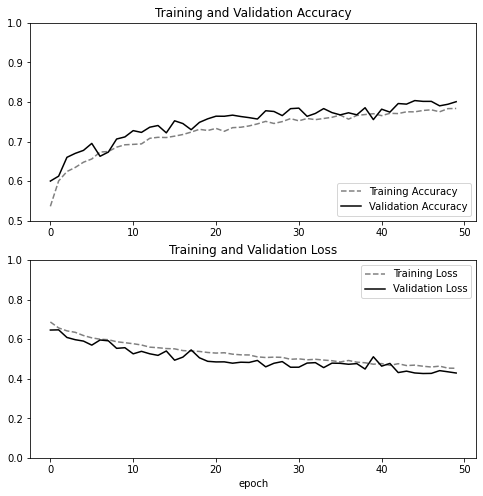

In [ ]:
#There are two variable objects. Divided between around 2.5 million of MobilNet parameters which 
#are frozen, and 1.2 thousand of trainable parameter in the Dense layer
#len(cnn.trainable_variables)

acc = model_fit.history['accuracy']
val_acc = model_fit.history['val_accuracy']
loss_ = model_fit.history['loss']
val_loss_ = model_fit.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy', color = 'gray',linestyle='dashed')
plt.plot(val_acc, label='Validation Accuracy', color = 'black')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss_, label='Training Loss', color = 'gray',linestyle='dashed')
plt.plot(val_loss_, label='Validation Loss', color = 'black')
plt.ylim([0, 1.0])
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()


In [17]:
def my_loss_fn(y_true, y_pred):
  y_pred_binary = tf.round(y_pred)
  temp = tf.cast(tf.equal(y_pred_binary, y_true), tf.float32)
  #accuracy = tf.reduce_mean(temp, 1)
  batch_loss = tf.reduce_mean(temp)
  return batch_loss

In [18]:

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)
X_new_scaled = X_test_scaled


class MySGDOptimizer(keras.optimizers.Optimizer):
    def __init__(self, learning_rate=0.001, momentum=0.9, name="MySGDOptimizer", **kwargs):
        """Call super().__init__() and use _set_hyper() to store hyperparameters"""
        super().__init__(name, **kwargs)
        self._set_hyper("learning_rate", kwargs.get("lr", learning_rate)) # handle lr=learning_rate
        self._set_hyper("decay", self._initial_decay) # 
        self._set_hyper("momentum", momentum)
    
    def _create_slots(self, var_list):
        """For each model variable, create the optimizer variable associated with it.
        TensorFlow calls these optimizer variables "slots".
        For momentum optimization, we need one momentum slot per model variable.
        """
        for var in var_list:
            self.add_slot(var, "momentum")

    @tf.function
    def _resource_apply_dense(self, grad, var):
        """Update the slots and perform one optimization step for one model variable
        """
        var_dtype = var.dtype.base_dtype
        lr_t = self._decayed_lr(var_dtype) # handle learning rate decay
#         momentum_var = self.get_slot(var, "momentum")
#         momentum_hyper = self._get_hyper("momentum", var_dtype)
#         momentum_var.assign(momentum_var * momentum_hyper - (1. - momentum_hyper)* grad)
        var.assign_sub(grad * lr_t)

    def _resource_apply_sparse(self, grad, var):
        raise NotImplementedError

    def get_config(self):
        base_config = super().get_config()
        return {
            **base_config,
            "learning_rate": self._serialize_hyperparameter("learning_rate"),
            "decay": self._serialize_hyperparameter("decay"),
            "momentum": self._serialize_hyperparameter("momentum"),
        }
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
model = keras.models.Sequential([keras.layers.Dense(1, input_shape=[8])])
model.compile(loss=my_loss_fn, optimizer=MySGDOptimizer(learning_rate=0.001))
model.fit(X_train_scaled, y_train, epochs=20)


Epoch 1/20


ValueError: ignored